In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040472.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2        3         4         5         6  \
0  1.223851  1.200391  1.180841  1.16129  1.143695  1.129032  1.121212   

          7        8        9  ...      4192      4193      4194      4195  \
0  1.123167  1.13392  1.15347  ...  1.823069  1.802542  1.786901  1.774194   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.763441  1.754643  1.745846  1.737048         123.0           64.0  

[1 rows x 4202 columns]
[123.]  /  [64.]
          0         1         2        3         4         5         6  \
0  1.223851  1.200391  1.180841  1.16129  1.143695  1.129032  1.121212   

          7        8        9  ...     4190      4191      4192      4193  \
0  1.123167  1.13392  1.15347  ...  1.85044  1.840665  1.823069  1.802542   

       4194      4195      4196      4197      4198      4199  
0  1.786901  1.774194  1.763441  1.754643  1.745846  1.737048  

[1 rows x 4200 columns]


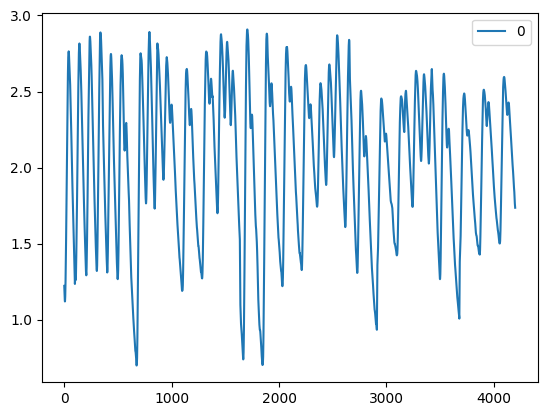

In [409]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [410]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

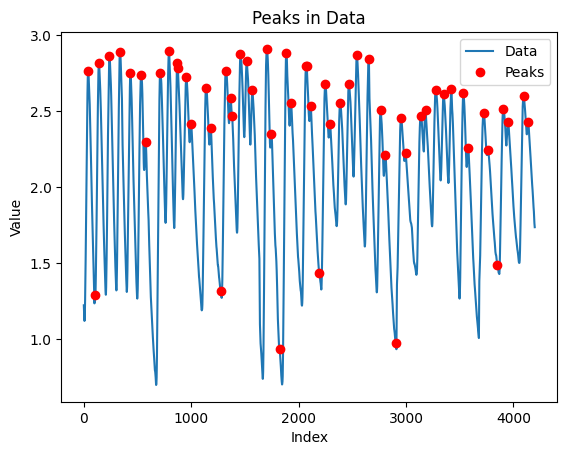

{'indices': array([  41,  102,  141,  239,  336,  434,  534,  577,  711,  793,  867,
        873,  954,  999, 1140, 1181, 1274, 1322, 1367, 1381, 1459, 1516,
       1570, 1704, 1746, 1823, 1886, 1929, 2070, 2074, 2112, 2193, 2250,
       2293, 2386, 2469, 2541, 2652, 2763, 2809, 2904, 2952, 2996, 3137,
       3182, 3276, 3350, 3423, 3535, 3580, 3724, 3764, 3852, 3906, 3950,
       4096, 4137]), 'values': array([2.76441838, 1.29032258, 2.81622678, 2.86119257, 2.88856305,
       2.74682307, 2.73900293, 2.29423265, 2.75171065, 2.8914956 ,
       2.81622678, 2.7829912 , 2.72629521, 2.41446725, 2.64907136,
       2.38611926, 1.31671554, 2.76344086, 2.58455523, 2.47018573,
       2.87683284, 2.82697947, 2.63734115, 2.90811339, 2.34897361,
       0.93450635, 2.88074291, 2.5542522 , 2.79276637, 2.79276637,
       2.53176931, 1.43890518, 2.6744868 , 2.41642229, 2.55522972,
       2.67839687, 2.86999022, 2.83968719, 2.50537634, 2.20821114,
       0.97653959, 2.45454545, 2.22385142, 2.46920821, 2

In [411]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [412]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.764418377321604, None, 2.81622678396872, 2.8611925708699903, 2.8885630498533725, 2.7468230694037143, 2.7390029325513194, 2.294232649071359, 2.7517106549364616, 2.8914956011730206, 2.81622678396872, 2.782991202346041, 2.7262952101661777, 2.4144672531769307, 2.649071358748778, 2.386119257086999, None, 2.763440860215054, 2.58455522971652, 2.4701857282502444, 2.87683284457478, 2.8269794721407626, 2.6373411534701856, 2.90811339198436, 2.3489736070381237, None, 2.8807429130009776, 2.5542521994134897, 2.792766373411535, 2.792766373411535, 2.5317693059628543, None, 2.674486803519061, 2.4164222873900294, 2.555229716520039, 2.678396871945259, 2.8699902248289346, 2.8396871945259043, 2.505376344086021, 2.2082111436950145, None, 2.4545454545454546, 2.2238514173998043, 2.469208211143695, 2.505376344086021, 2.636363636363636, 2.613880742913001, 2.6480938416422286, 2.6177908113391983, 2.2561094819159337, 2.487781036168133, 2.247311827956989, None, 2.512218963831867, 2.43108504398827, 2.596285434995

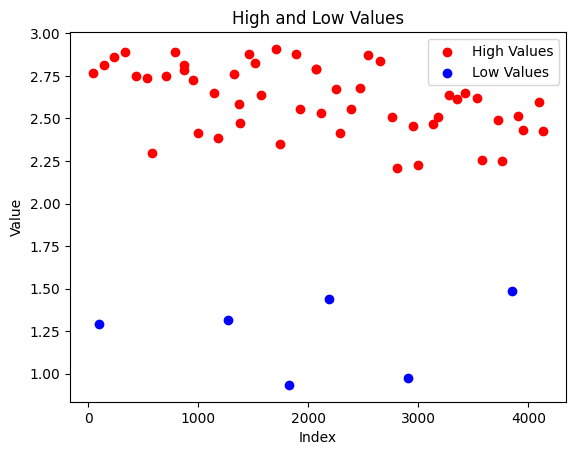

In [413]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [414]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.6151649320529775
Average Low Value: 1.2407950472466602


In [427]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=3, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [428]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.6151649320529775 : 0.8717216440176592
Scaled value of 1.2407950472466602 : 0.4135983490822201
